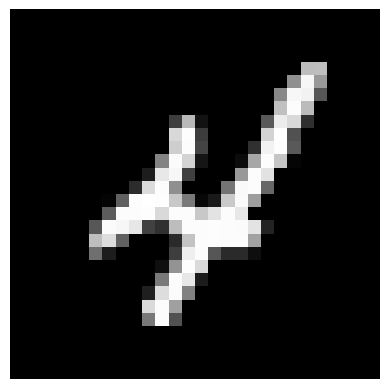

In [11]:
import tensorflow_datasets as tfds
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np




# #load the data from tensorflow datasets
# ds_train, ds_info = tfds.load(
#     'celeb_a', split='test', shuffle_files=False,
#     with_info = True, download=True
# )

# #convert it into pandas dataframe
# ds_train_df = tfds.as_dataframe(ds_train, ds_info)

# fig, ax = plt.subplot(3,3, figsize=(10,10))

# for i, a in enumerate(ax.flat):
#     image = ds_train_df['image'][i]
#     a.imshow(image.numpy().astype(np.uint8))
#     a.axis('off')

# plt.show()

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#fig, axes = plt.subplot(figsize=(10,10))

for index in range(10):
    image = x_train[index]
    plt.imshow(image, cmap='gray')
    plt.axis('off')


plt.show()


In [12]:
#converting the images to binaries

def binarize(image, label):
    image = tf.cast(image, tf.float32)  #cast the image to float32
    image = tf.math.round(image / 255)
    return image, tf.cast(image, tf.int32)


In [ ]:
#creating custom layer using keras layers

class MaskedConv2D(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__(self)

    def build(self, input_shape):
        self.w = self.add_weight(shape=[self.kernel, self.kernel, input_shape[-1], self.filters],
                    initializer='glorot_normal', trainable=True)
        
        self.b = self.add_weight(shape=(self.filters,),
                                 initializer='zeros',
                                 trainable=True)
        
        mask = np.ones(self.kernel ** 2, dtype=np.float32)
        center = len(mask) / 2

        mask[center+1:] = 0

        if self.mask_type == 'A':
            mask[center] = 0

        mask = mask.reshape((self.kernel, self.kernel, 1,1))
        self.mask = tf.constant(mask, dtype='float32')

    
    def call(self, inputs):
        masked_w = tf.math.multiply(self.w, self.mask)
        output = tf.nn.conv2d(inputs, masked_w, 1, 'SAME') + self.b

        return output